In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Homework:
# Write your own leapfrog scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.5. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. (Hint: both stars will drift
# together first, and then being kicked at the middle step at the same time, 
# and then drfit again)

In [ ]:
# There are series of situation that meet the requirement separation = 1 and e=0.5
# But to be simple, I only consider two simple situations (so the the velocity is percendicular to the y-axis)
# The first is that the stars start at perigee (it has highest velocity within its orbit)
# It's also the highest initial velocity among all the solution.
# The second is that the stars start at agogee (it has lowest velocity within its orbit)
# It's also the lowest initial velocity among all the solution.
# https://en.wikipedia.org/wiki/Orbit_equation

# Blue represents star 1 that starts at (0.5,0); Orange represents star 2 that starts at (-0.5,0)

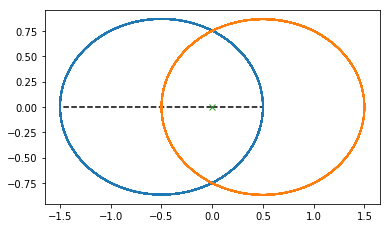

In [2]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M1=1.
M2=1.
tend=2.*np.pi*100
h=0.01
a=0.5
vi=  np.sqrt(0.75)
y=[a,0.,0.,vi, -a, 0., 0, -vi]
t=0

def f(t, y):
    f=np.zeros(8)
    r=np.sqrt((y[0]-y[4])**2+(y[2]-y[6])**2)
  
    
    f[0]=y[1]
    f[1]=G*M2/r/r/r*(y[4]-y[0])
    f[2]=y[3]
    f[3]=G*M2/r/r/r*(y[6]-y[2])
    
    f[4]=y[5]
    f[5]=G*M1/r/r/r*(y[0]-y[4])
    f[6]=y[7]
    f[7]=G*M1/r/r/r*(y[2]-y[6])
    
    return f
    
def lf(t, h, y, n):
    # drift step
    fv=f(t, y)
    for i in [0,2, 4, 6]:
        y[i]+=fv[i]*h/2.
    # Please finish kick and drift step
    fv=f(t+h/2., y)
    for i in [1,3, 5, 7]:
        y[i]+=fv[i]*h
        
    # kick step
    for i in [0,2, 4, 6]:
        y[i]+=y[i+1]*h/2.
    # drift step
    
    return y

xp1=[]
yp1=[]

xp2=[]
yp2=[]

ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = lf(t,h,y,8)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[2])
    xp2=np.append(xp2,y[4])
    yp2=np.append(yp2,y[6])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp1,yp1)
plt.plot(xp2,yp2)
plt.axis('scaled')

plt.hlines(0,0, -1-0.5, linestyle='--')
plt.plot(0,0,'x')
plt.hlines(0,0, 0.5, linestyle='--')



#plt.xlim(-2,2)
#plt.ylim(-2,2)

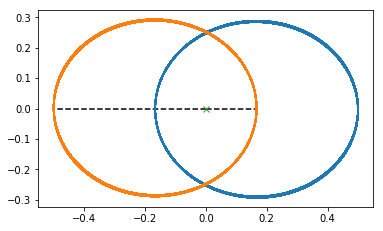

In [3]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M1=1.
M2=1.
tend=2.*np.pi* 100
h=0.002

vi=  np.sqrt(1./3.) * np.sqrt(0.75)
y=[0.5,0.,0.,vi, -0.5, 0., 0, -vi]
t=0

def f(t, y):
    f=np.zeros(8)
    r=np.sqrt((y[0]-y[4])**2+(y[2]-y[6])**2)
  
    
    f[0]=y[1]
    f[1]=G*M2/r/r/r*(y[4]-y[0])
    f[2]=y[3]
    f[3]=G*M2/r/r/r*(y[6]-y[2])
    
    f[4]=y[5]
    f[5]=G*M1/r/r/r*(y[0]-y[4])
    f[6]=y[7]
    f[7]=G*M1/r/r/r*(y[2]-y[6])
    
    return f
    
def lf(t, h, y, n):
    # drift step
    fv=f(t, y)
    for i in [0,2, 4, 6]:
        y[i]+=fv[i]*h/2.
    # Please finish kick and drift step
    fv=f(t+h/2., y)
    for i in [1,3, 5, 7]:
        y[i]+=fv[i]*h
        
    # kick step
    for i in [0,2, 4, 6]:
        y[i]+=y[i+1]*h/2.
    # drift step
    
    return y

xp1=[]
yp1=[]

xp2=[]
yp2=[]

ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = lf(t,h,y,8)
    xp1=np.append(xp1,y[0])
    yp1=np.append(yp1,y[2])
    xp2=np.append(xp2,y[4])
    yp2=np.append(yp2,y[6])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp1,yp1)
plt.plot(xp2,yp2)
plt.axis('scaled')

plt.hlines(0,0, -0.5, linestyle='--')
plt.plot(0,0,'x')
plt.hlines(0,0, 1./6., linestyle='--')



#plt.xlim(-2,2)
#plt.ylim(-2,2)